In [ ]:
from google.colab import files
uploaded = files.upload()

Saving green_tech_data.csv to green_tech_data.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('green_tech_data.csv')
print(df.head())

   carbon_emissions  energy_output  renewability_index  cost_efficiency  \
0        181.089042     128.286267            0.642032         0.732568   
1        382.750007     672.769370            0.084140         2.891096   
2        306.197880     382.920383            0.161629         2.932858   
3        259.530469     557.713622            0.898554         3.368435   
4        104.606524     916.809827            0.606429         3.767411   

   sustainability  
0               1  
1               0  
2               0  
3               0  
4               0  


In [ ]:
df.describe()

,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,214.563260,548.048551,0.517601,2.710170,0.15000
std,104.121294,263.800127,0.293426,1.320535,0.35887
min,51.932741,106.256917,0.005062,0.564771,0.00000
25%,117.620266,317.804074,0.276880,1.623267,0.00000
50%,212.449859,555.062371,0.562555,2.793732,0.00000
75%,305.571092,789.565238,0.752367,3.810999,0.00000
max,395.410428,987.085409,0.990054,4.957273,1.00000


In [ ]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


Class Distribution:
 sustainability
0    85
1    15
Name: count, dtype: int64


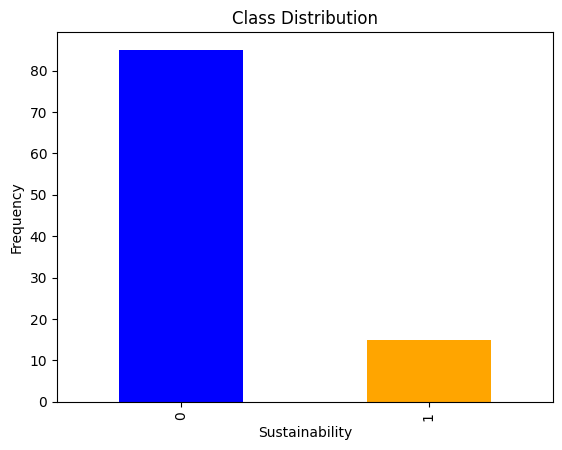

Imbalance Ratio: 0.18
Data is imbalanced.


In [ ]:
# Count of each class
class_counts = df['sustainability'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot class distribution
import matplotlib.pyplot as plt

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Sustainability')
plt.ylabel('Frequency')
plt.show()

# Check balance threshold
imbalance_ratio = class_counts.min() / class_counts.max()
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")

if imbalance_ratio < 0.5:
    print("Data is imbalanced.")
else:
    print("Data is balanced.")

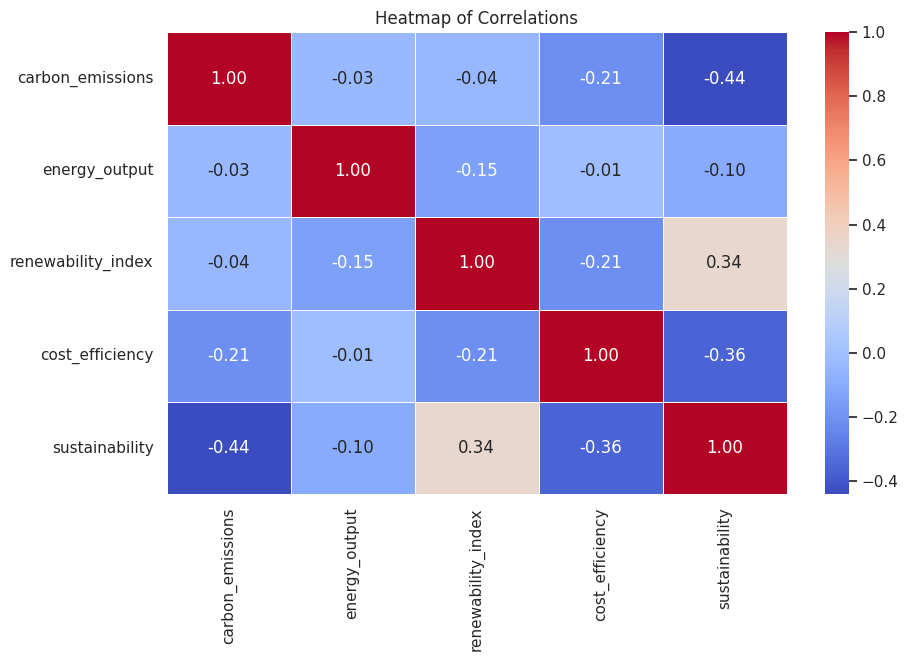

In [ ]:
# Set plot style
sns.set_theme(style="whitegrid")

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlations')
plt.show()


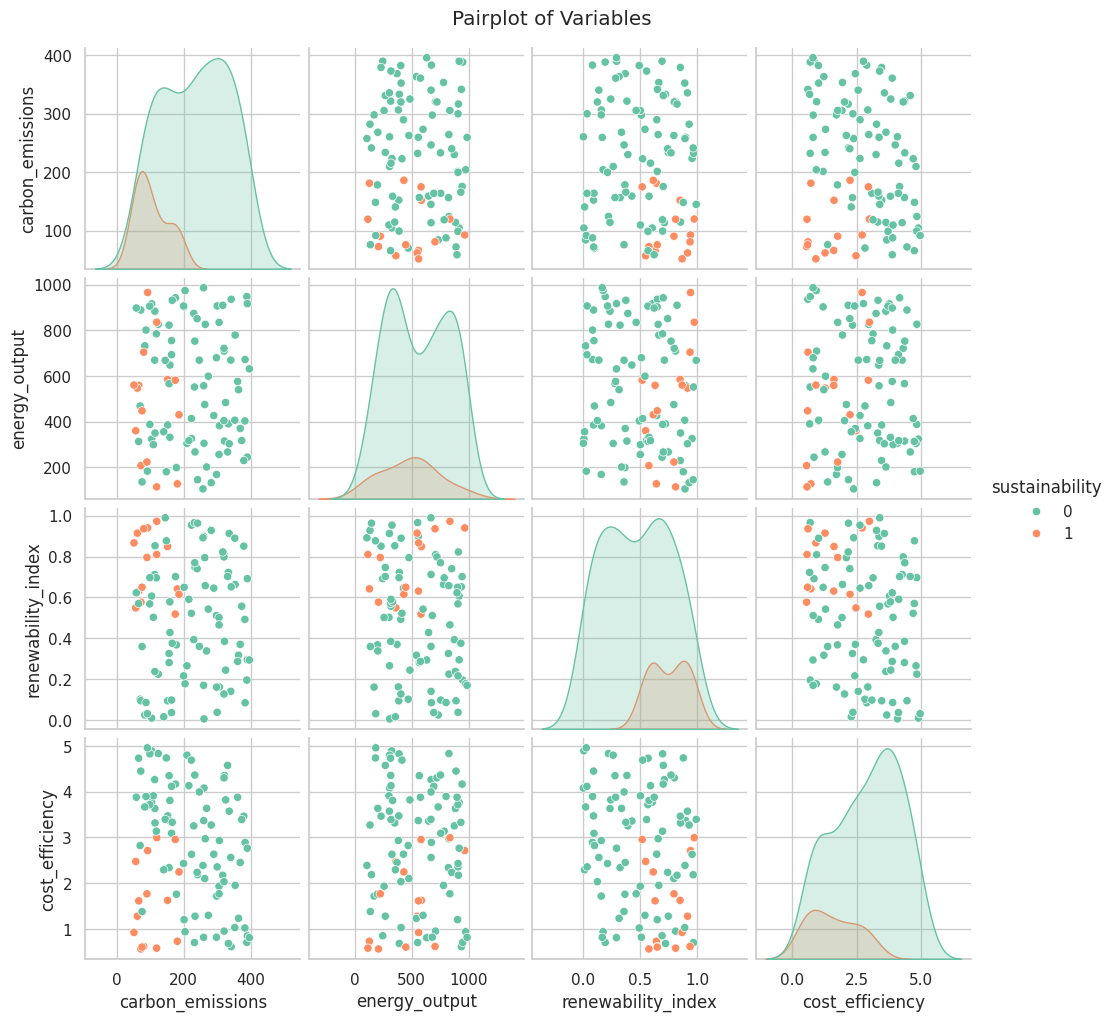

In [ ]:
# Pairplot for scatterplots and distributions
sns.pairplot(df, diag_kind='kde', hue='sustainability', palette='Set2')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()

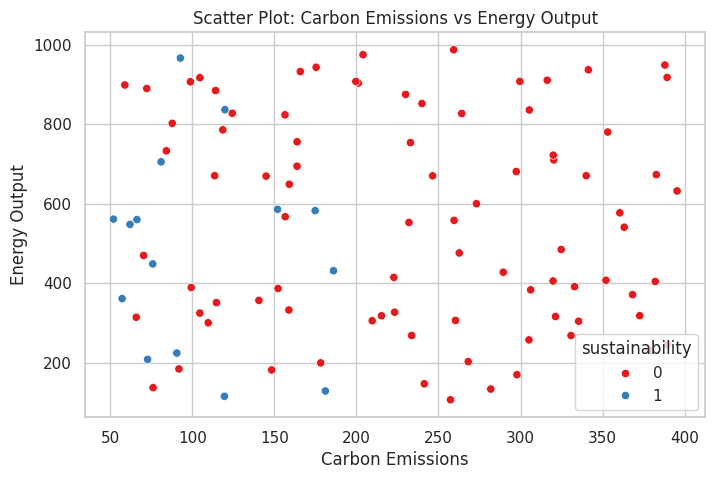

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='carbon_emissions', y='energy_output', hue='sustainability', data=df, palette='Set1')
plt.title('Scatter Plot: Carbon Emissions vs Energy Output')
plt.xlabel('Carbon Emissions')
plt.ylabel('Energy Output')
plt.show()

<ipython-input-36-4f2f56ad0b7e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sustainability', y='cost_efficiency', data=df, palette='Set3')


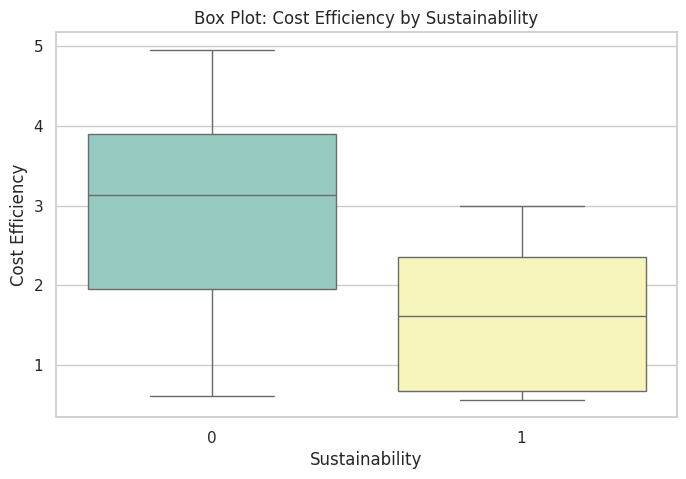

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='sustainability', y='cost_efficiency', data=df, palette='Set3')
plt.title('Box Plot: Cost Efficiency by Sustainability')
plt.xlabel('Sustainability')
plt.ylabel('Cost Efficiency')
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split

# Define the feature (X) and the target variable (Y)
X = df[['carbon_emissions','renewability_index','cost_efficiency']]  # Independent variable
Y = df['sustainability']       # Dependent variable






In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
X_train.head()

,carbon_emissions,renewability_index,cost_efficiency
55,372.655982,0.556801,3.390887
88,360.524460,0.286541,3.877766
26,119.885824,0.973011,2.994593
42,62.035982,0.914864,1.279408
69,395.410428,0.293592,0.812126


In [ ]:
y_pred=model.predict(X_test.values)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


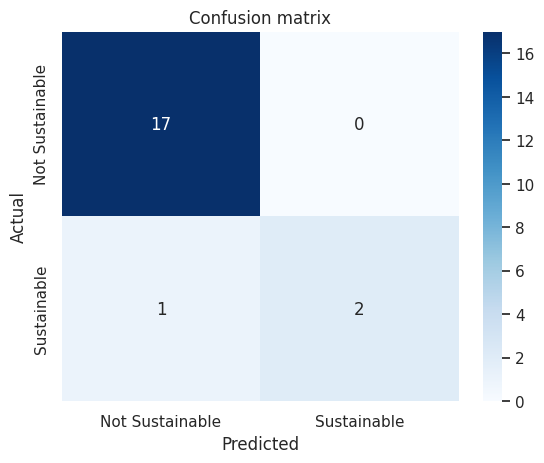

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix=confusion_matrix(Y_test,y_pred)

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Sustainable', 'Sustainable'],
           yticklabels=['Not Sustainable', 'Sustainable'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

In [ ]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred,target_names=['Not Sustainable', 'Sustainable']))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [ ]:
coefficients = pd.DataFrame(model.coef_.T,index=X.columns,columns=['Coefficient'])
print(coefficients)

                    Coefficient
carbon_emissions      -0.022859
renewability_index     1.095343
cost_efficiency       -1.164613


In [ ]:
import joblib
#save the model to a file
joblib.dump(model,'lrmodel_sustainability.pkl')

['lrmodel_sustainability.pkl']

In [ ]:
import numpy as np

# Assuming 'model' is your trained model

new_data = np.array([[22.49, 0.85, 0.72]])  # Example values for carbon_emissions, renewability_index, cost_efficiency
predictions = model.predict(new_data)
print(predictions)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
import numpy as np
# Assuming 'model' is your trained model
new_data = np.array([[22.49, 0.85, 0.72,]])  # Example values for carbon_emissions, renewability_index, cost_efficiency
predictions = model.predict(new_data)
print("Output:",predictions)
if predictions==1:
    print("Sustainable")
else:
    print("Non-Sustainable")


Output: [1]
Sustainable


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
